# Prelmininaries
Here we perform the necessary import duties, and also assign filenames. Lastly, we import the data into a dictionary of pandas DataFrames. Note that the file we read in is large (>>1e5 rows on each sheet except the last); be patient! 

In [6]:
import pandas as pd, numpy as np, os, sys, itertools

# Get dir name of parent directory
parent=os.path.dirname(os.getcwd()); sys.path.insert(0, parent); datadir=parent+"/Data/"

import GeneralFunctions as GF # Note that we add to the path variable

# File name
fname=datadir+"AllStations.xlsx"

# Places
places=["Pheriche","Kala_Patthar","Pyramid","SCol"]
obs={}

# Read in all observational data to Pandas DataFrame
for ii in range(len(places)): obs[places[ii]]=\
    pd.read_excel(fname,sheet_name=places[ii],index_col=0,parse_dates=True)
    
    

# Summaries
In this code block we simply take some of the "easy" summaries: min/max temp; pressure; wind. 
Note that a more rigorous QA is really needed here; so far only a manual check has been applied to the raw spreadhseet values

In [7]:
iteri=list(itertools.product(places,["Temp","Press","Windspeed"]))
for ii in range(len(iteri)): 

    # Place/variable
    p=iteri[ii][0]; v=iteri[ii][1]
    
    # Correct on the fly (missing value flag)
    idx=obs[p][v]<-500; 
    obs[p][v][idx]=np.nan
    
    # Compute min/max
    smin=np.min(pd.to_numeric(obs[p][v])); smax=np.max(pd.to_numeric(obs[p][v]))#
    
    # Report results
    print "Min %s at %s = %.3f | Max = %.3f" % (v,p,smin,smax)

Min Temp at Pheriche = -22.230 | Max = 16.000
Min Press at Pheriche = 591.500 | Max = 614.900
Min Windspeed at Pheriche = 0.000 | Max = 21.900
Min Temp at Kala_Patthar = -55.800 | Max = 98.680
Min Press at Kala_Patthar = 50.000 | Max = 721.460
Min Windspeed at Kala_Patthar = 0.000 | Max = 28.490
Min Temp at Pyramid = -22.150 | Max = 12.930
Min Press at Pyramid = 450.000 | Max = 673.100
Min Windspeed at Pyramid = 0.000 | Max = 16.570
Min Temp at SCol = -32.000 | Max = 4.300
Min Press at SCol = 368.500 | Max = 389.000
Min Windspeed at SCol = 0.000 | Max = 49.400


In [15]:
# Stratify into temps <0 and compute the mean Spec Hum and mean Spec Hum velocity product 
for p in places:
    idx=obs[p]["Temp"]<=1000
    q=GF.specHum(temp=obs[p]["Temp"][idx],rh=obs[p]["Relhum"][idx],press=obs[p]["Press"])*1e3 # g/kg
    qV=q*obs[p]["Windspeed"][idx]
    print p,"...",np.mean(q,), np.mean(qV)


Pheriche ... 6.0855268152 19.082552781
Kala_Patthar ... 3.58461416699 7.87529626014
Pyramid ... 4.25398980747 8.86737680642
SCol ... 1.93398138513 8.16071999454


-22.15


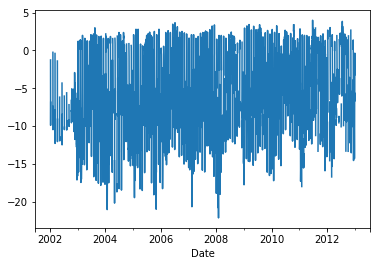

In [14]:
%matplotlib inline 
import matplotlib, matplotlib.pyplot as plt
daily_test=obs["Pyramid"].resample("D").min()
#print(daily_test.head(3))
# Plots
daily_test["Temp"].plot(); print (np.min(daily_test["Temp"]))